## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pre_activate=False):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
                
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128]
PRE_ACTIVATE = [True, False]
MOMENTUM = 0.95

In [10]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
for i, (use_preact, bz) in enumerate(itertools.product(PRE_ACTIVATE, BATCH_SIZE)):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Numbers of exp: %i, use_preact: %s, batch_size: %i" % (i, use_preact, bz))
    model = build_mlp(input_shape=x_train.shape[1:], pre_activate=use_preact)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bz, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Numbers of exp: 0, use_preact: True, batch_size: 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activati

50000/50000 [==============================] - 821s 16ms/step - loss: 2.2007 - accuracy: 0.1883 - val_loss: 2.1360 - val_accuracy: 0.2062
Epoch 43/50
50000/50000 [==============================] - 817s 16ms/step - loss: 2.2047 - accuracy: 0.1795 - val_loss: 2.1538 - val_accuracy: 0.1828
Epoch 44/50
50000/50000 [==============================] - 826s 17ms/step - loss: 2.2064 - accuracy: 0.1800 - val_loss: 2.1596 - val_accuracy: 0.1891
Epoch 45/50
50000/50000 [==============================] - 818s 16ms/step - loss: 2.2002 - accuracy: 0.1846 - val_loss: 2.1463 - val_accuracy: 0.1864
Epoch 46/50
50000/50000 [==============================] - 818s 16ms/step - loss: 2.1966 - accuracy: 0.1879 - val_loss: 2.1607 - val_accuracy: 0.1899
Epoch 47/50
50000/50000 [==============================] - 821s 16ms/step - loss: 2.2030 - accuracy: 0.1815 - val_loss: 2.1446 - val_accuracy: 0.1845
Epoch 48/50
50000/50000 [==============================] - 816s 16ms/step - loss: 2.2062 - accuracy: 0.1735 - va

50000/50000 [==============================] - 104s 2ms/step - loss: 0.6210 - accuracy: 0.7795 - val_loss: 1.6662 - val_accuracy: 0.5205
Epoch 35/50
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5996 - accuracy: 0.7875 - val_loss: 1.7920 - val_accuracy: 0.5004
Epoch 36/50
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5909 - accuracy: 0.7884 - val_loss: 1.5815 - val_accuracy: 0.5371
Epoch 37/50
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5795 - accuracy: 0.7934 - val_loss: 1.8749 - val_accuracy: 0.5143
Epoch 38/50
50000/50000 [==============================] - 107s 2ms/step - loss: 0.5774 - accuracy: 0.7963 - val_loss: 1.8030 - val_accuracy: 0.5170
Epoch 39/50
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5628 - accuracy: 0.7987 - val_loss: 1.6614 - val_accuracy: 0.5289
Epoch 40/50
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5504 - accuracy: 0.8057 - val_loss:

50000/50000 [==============================] - 55s 1ms/step - loss: 0.4439 - accuracy: 0.8401 - val_loss: 1.9971 - val_accuracy: 0.5006
Epoch 27/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4283 - accuracy: 0.8446 - val_loss: 2.0654 - val_accuracy: 0.5125
Epoch 28/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4081 - accuracy: 0.8566 - val_loss: 2.1318 - val_accuracy: 0.4969
Epoch 29/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4032 - accuracy: 0.8575 - val_loss: 2.0564 - val_accuracy: 0.5121
Epoch 30/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3784 - accuracy: 0.8659 - val_loss: 2.3280 - val_accuracy: 0.4962
Epoch 31/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3739 - accuracy: 0.8682 - val_loss: 2.1101 - val_accuracy: 0.5029
Epoch 32/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3595 - accuracy: 0.8717 - val_loss: 2.3736

50000/50000 [==============================] - 16s 325us/step - loss: 0.3467 - accuracy: 0.8789 - val_loss: 2.1327 - val_accuracy: 0.4950
Epoch 19/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.3104 - accuracy: 0.8919 - val_loss: 2.4808 - val_accuracy: 0.4547
Epoch 20/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.2833 - accuracy: 0.9011 - val_loss: 2.4854 - val_accuracy: 0.4632
Epoch 21/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.2628 - accuracy: 0.9076 - val_loss: 2.5445 - val_accuracy: 0.4536
Epoch 22/50
50000/50000 [==============================] - 16s 325us/step - loss: 0.2492 - accuracy: 0.9123 - val_loss: 3.4818 - val_accuracy: 0.4117
Epoch 23/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.2364 - accuracy: 0.9176 - val_loss: 2.4801 - val_accuracy: 0.4984
Epoch 24/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.2132 - accuracy: 0.9259 - va

Epoch 10/50
50000/50000 [==============================] - 834s 17ms/step - loss: 2.2047 - accuracy: 0.1814 - val_loss: 26.8239 - val_accuracy: 0.2283
Epoch 11/50
50000/50000 [==============================] - 825s 16ms/step - loss: 2.2057 - accuracy: 0.1819 - val_loss: 31.7712 - val_accuracy: 0.2287
Epoch 12/50
50000/50000 [==============================] - 830s 17ms/step - loss: 2.2083 - accuracy: 0.1826 - val_loss: 60.2933 - val_accuracy: 0.2349
Epoch 13/50
50000/50000 [==============================] - 823s 16ms/step - loss: 2.2083 - accuracy: 0.1837 - val_loss: 71.7109 - val_accuracy: 0.2444
Epoch 14/50
50000/50000 [==============================] - 826s 17ms/step - loss: 2.2136 - accuracy: 0.1801 - val_loss: 293.8082 - val_accuracy: 0.2551
Epoch 15/50
50000/50000 [==============================] - 827s 17ms/step - loss: 2.2118 - accuracy: 0.1814 - val_loss: 116.4515 - val_accuracy: 0.2505
Epoch 16/50
50000/50000 [==============================] - 825s 17ms/step - loss: 2.2044 - a

50000/50000 [==============================] - 117s 2ms/step - loss: 1.8370 - accuracy: 0.3440 - val_loss: 1.8119 - val_accuracy: 0.3506
Epoch 2/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.6836 - accuracy: 0.3981 - val_loss: 1.7976 - val_accuracy: 0.3623
Epoch 3/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.6070 - accuracy: 0.4249 - val_loss: 1.6010 - val_accuracy: 0.4355
Epoch 4/50
50000/50000 [==============================] - 112s 2ms/step - loss: 1.5545 - accuracy: 0.4462 - val_loss: 1.6125 - val_accuracy: 0.4299
Epoch 5/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.5195 - accuracy: 0.4615 - val_loss: 1.5175 - val_accuracy: 0.4580
Epoch 6/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.4896 - accuracy: 0.4716 - val_loss: 1.5353 - val_accuracy: 0.4604
Epoch 7/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.4606 - accuracy: 0.4816 - val_loss: 1.487

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 58s 1ms/step - loss: 1.7603 - accuracy: 0.3757 - val_loss: 1.8222 - val_accuracy: 0.3511
Epoch 2/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5910 - accuracy: 0.4343 - val_loss: 1.8772 - val_accuracy: 0.3471
Epoch 3/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5084 - accuracy: 0.4640 - val_loss: 1.5996 - val_accuracy: 0.4368
Epoch 4/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.4508 - accuracy: 0.4817 - val_loss: 1.4847 - val_accuracy: 0.4729
Epoch 5/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.3978 - accuracy: 0.5023 - val_loss: 1.5476 - val_accuracy: 0.4513
Epoch 6/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.3764 - accuracy: 0.5117 - val_loss: 1.5884 - val_accuracy: 0.4399
Epoch 7/50
50000/50000 [==============================] - 57s 1ms/st

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.6939 - accuracy: 0.3995 - val_loss: 2.3813 - val_accuracy: 0.2659
Epoch 2/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.4990 - accuracy: 0.4663 - val_loss: 1.6791 - val_accuracy: 0.3944
Epoch 3/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.4054 - accuracy: 0.4998 - val_loss: 1.6749 - val_accuracy: 0.4079
Epoch 4/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.3391 - accuracy: 0.5250 - val_loss: 1.7786 - val_accuracy: 0.3666
Epoch 5/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.2917 - accuracy: 0.5414 - val_loss: 1.7159 - val_accuracy: 0.3966
Epoch 6/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.2420 - accuracy: 0.5591 - val_loss: 1.5274 - val_accuracy: 0.4568
Epoch 7/50
50000/50000 [==============================] 

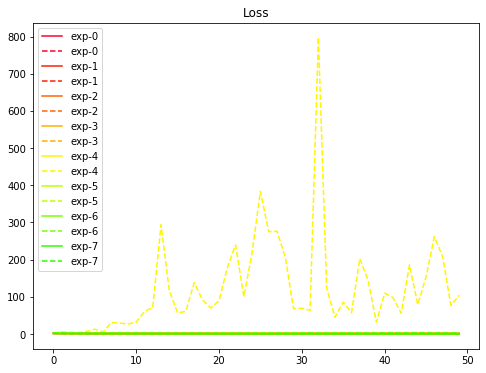

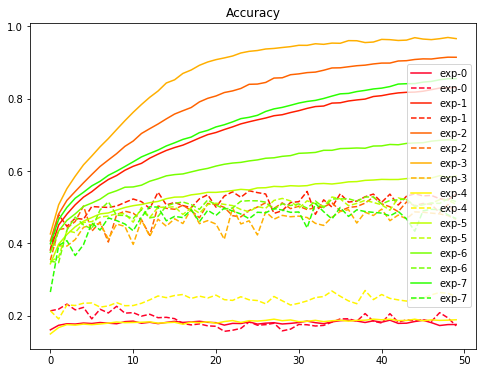

In [12]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()